In [ ]:
from pyspark.sql import SparkSession


spark_session_low_perf = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 1)\
        .config("spark.cores.max", 1)\
        .getOrCreate()

In [ ]:
from pyspark.sql import SparkSession


spark_session_single_executor = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 1)\
        .getOrCreate()

In [1]:
from pyspark.sql import SparkSession


spark_session_two_executors_low_perf = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 2)\
        .config("spark.cores.max", 2)\
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/22 04:29:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
from pyspark.sql import SparkSession


spark_session_max = SparkSession.builder\
        .master("spark://192.168.2.43:7077") \
        .appName("Analytics_SG")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.executor.instances", 2)\
        .config("spark.cores.max", 4)\
        .getOrCreate()

In [2]:
from pyspark.sql import functions as F

rdd_2000 = spark_session_two_executors_low_perf.read.csv("hdfs://192.168.2.43:9000/user/root/data/2000/merge.csv", header = True)

In [3]:
rdd_2000.take(10)

23/03/22 04:29:52 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(STATION='01001099999', DATE='2000-01-01T00:00:00', SOURCE='4', LATITUDE='70.9333333', LONGITUDE='-8.6666667', ELEVATION='9.0', NAME='JAN MAYEN NOR NAVY, NO', REPORT_TYPE='FM-12', CALL_SIGN='ENJA ', QUALITY_CONTROL='V020', WND='210,1,N,0021,1', CIG='00210,1,9,N', VIS='002500,1,N,1', TMP='+0010,1', DEW='+0003,1', SLP='09818,1', AA1='06,0041,9,1', AY1='8,1,06,1', AY2='5,1,06,1', GA1=None, GF1='08,99,1,08,1,06,1,00250,1,99,9,99,9', KA1=None, MA1='99999,9,09806,1', MD1='5,1,007,1,+999,9', MW1='50,1', OA1=None, OA2=None, SA1=None, UA1=None, REM='SYN088AAXX  01004 01001 11325 82104 10010 20003 39806 49818 55007 60041 75085 886// 333 91119;', EQD=None),
 Row(STATION='01001099999', DATE='2000-01-01T06:00:00', SOURCE='4', LATITUDE='70.9333333', LONGITUDE='-8.6666667', ELEVATION='9.0', NAME='JAN MAYEN NOR NAVY, NO', REPORT_TYPE='FM-12', CALL_SIGN='ENJA ', QUALITY_CONTROL='V020', WND='250,1,N,0036,1', CIG='00750,1,9,N', VIS='025000,1,N,1', TMP='+0012,1', DEW='-0022,1', SLP='09865,1', AA1='12,

In [4]:
rdd_2000.head()

Row(STATION='01001099999', DATE='2000-01-01T00:00:00', SOURCE='4', LATITUDE='70.9333333', LONGITUDE='-8.6666667', ELEVATION='9.0', NAME='JAN MAYEN NOR NAVY, NO', REPORT_TYPE='FM-12', CALL_SIGN='ENJA ', QUALITY_CONTROL='V020', WND='210,1,N,0021,1', CIG='00210,1,9,N', VIS='002500,1,N,1', TMP='+0010,1', DEW='+0003,1', SLP='09818,1', AA1='06,0041,9,1', AY1='8,1,06,1', AY2='5,1,06,1', GA1=None, GF1='08,99,1,08,1,06,1,00250,1,99,9,99,9', KA1=None, MA1='99999,9,09806,1', MD1='5,1,007,1,+999,9', MW1='50,1', OA1=None, OA2=None, SA1=None, UA1=None, REM='SYN088AAXX  01004 01001 11325 82104 10010 20003 39806 49818 55007 60041 75085 886// 333 91119;', EQD=None)

In [5]:
from pyspark.sql.functions import regexp_extract
from pyspark.sql.functions import avg
import time

In [6]:
start = time.time()
rdd_2000 = rdd_2000.withColumn("TMP_value", regexp_extract("TMP", r"\+(\d+),\d+", 1))
rdd_2000 = rdd_2000.drop("TMP")
rdd_2000.take(1)

[Row(STATION='01001099999', DATE='2000-01-01T00:00:00', SOURCE='4', LATITUDE='70.9333333', LONGITUDE='-8.6666667', ELEVATION='9.0', NAME='JAN MAYEN NOR NAVY, NO', REPORT_TYPE='FM-12', CALL_SIGN='ENJA ', QUALITY_CONTROL='V020', WND='210,1,N,0021,1', CIG='00210,1,9,N', VIS='002500,1,N,1', DEW='+0003,1', SLP='09818,1', AA1='06,0041,9,1', AY1='8,1,06,1', AY2='5,1,06,1', GA1=None, GF1='08,99,1,08,1,06,1,00250,1,99,9,99,9', KA1=None, MA1='99999,9,09806,1', MD1='5,1,007,1,+999,9', MW1='50,1', OA1=None, OA2=None, SA1=None, UA1=None, REM='SYN088AAXX  01004 01001 11325 82104 10010 20003 39806 49818 55007 60041 75085 886// 333 91119;', EQD=None, TMP_value='0010')]

In [7]:
# group by station
rdd_2000_stations_avg = rdd_2000.groupby("STATION").agg(avg("TMP_value").alias("average_TMP"))
rdd_2000_stations_avg.show()

+-----------+------------------+
|    STATION|       average_TMP|
+-----------+------------------+
|01097099999| 436.9111880046136|
|01112099999| 1096.598865949404|
|01110099999| 572.0127388535032|
|01113399999| 322.6586345381526|
|01115099999| 76.53757455268389|
|01068099999|230.58070652173913|
|01083099999|301.23567119155354|
|01065099999|102.78752107925801|
|01055099999| 64.03423094477408|
|01089099999| 355.3980388596332|
|01103099999|18.333333333333332|
|01074099999| 280.5693976805088|
|01108099999| 9519.548387096775|
|01078099999| 76.98612593383137|
|01088599999| 171.9386352479136|
|01092099999| 91.47527632344386|
|01098099999| 65.77167019027485|
|01059099999| 388.8259294265911|
|01062099999| 43.45391304347826|
|01102099999| 85.41463414634147|
+-----------+------------------+
only showing top 20 rows



In [8]:
# the maximum SLP_value
rdd_2000_stations_avg.describe()

DataFrame[summary: string, STATION: string, average_TMP: string]

In [9]:
from pyspark.sql.functions import col
rdd2000_stations_avg = rdd_2000_stations_avg.withColumn("average_TMP", col("average_TMP").cast("float"))

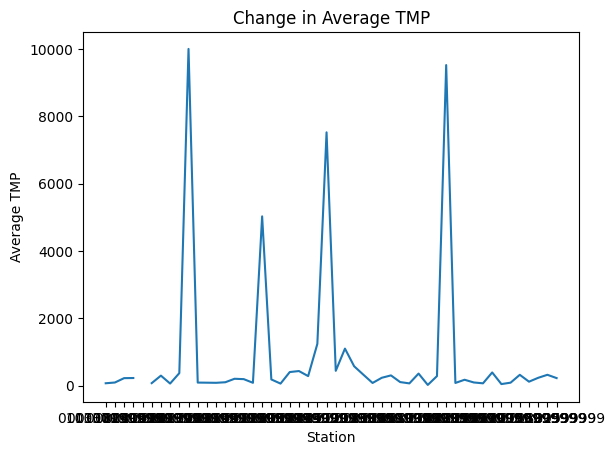

Specific configuration took 14.01 seconds


In [10]:
import matplotlib.pyplot as plt


station_tmp = rdd2000_stations_avg.select("STATION", "average_TMP")
station_tmp_rdd = station_tmp.rdd.map(tuple)
x = station_tmp_rdd.map(lambda row: row[0]).collect()
y = station_tmp_rdd.map(lambda row: row[1]).collect()
plt.plot(x, y)
plt.xlabel('Station')
plt.ylabel('Average TMP')
plt.title('Change in Average TMP')

plt.show()

end = time.time()
print(f"Specific configuration took {end-start:.2f} seconds")